In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(str(Path.cwd().parent))

In [2]:
from src.bks_api_func import authorize, get_token_from_txt_file, get_candles, get_option_maturity_date
access_token = authorize(get_token_from_txt_file())

In [3]:
option_candles = get_candles(access_token, "SR300CB6", "2026-01-15", "2026-02-15", "OPTSPOT", "H1")

In [4]:
stock_candles = get_candles(access_token, "SBER", "2026-01-15", "2026-02-15", "TQBR", "H1")

In [5]:
option_maturity_date = get_option_maturity_date(access_token, "SBER", "SR300CB6", sleep_time=1, size=100)
print(option_maturity_date)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 
2026-02-18 00:00:00


In [6]:
option_df = pd.DataFrame(option_candles)
option_df['time'] = pd.to_datetime(option_df['time'])
option_df = option_df.set_index('time')

stock_df = pd.DataFrame(stock_candles)
stock_df['time'] = pd.to_datetime(stock_df['time'])
stock_df = stock_df.set_index('time')

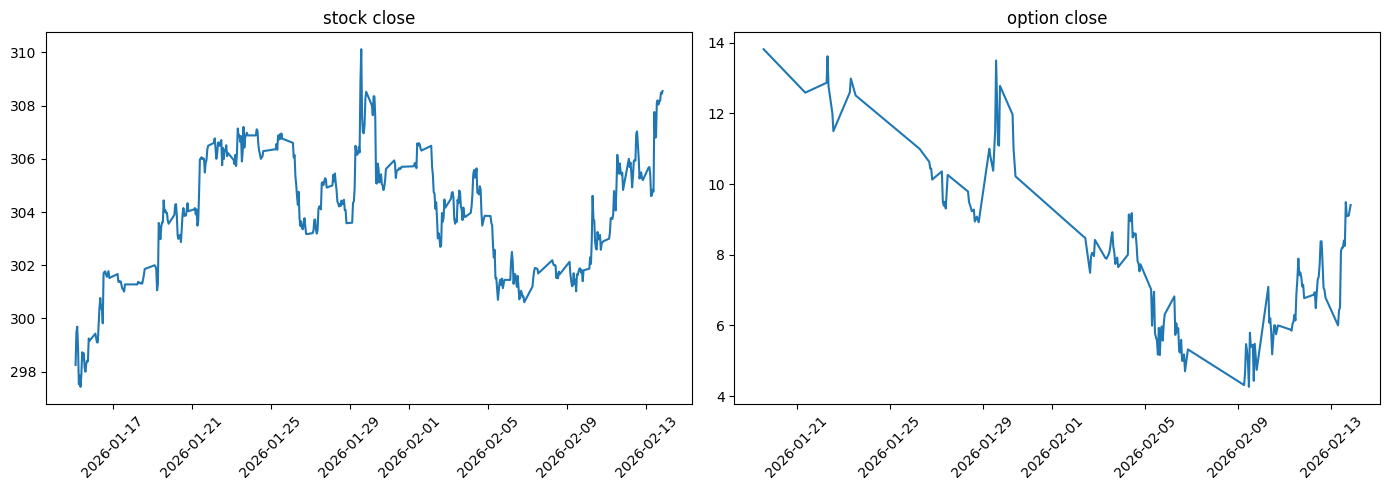

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.plot(stock_df.index, stock_df['close'])
ax1.set_title('stock close')
ax1.tick_params(axis='x', rotation=45)

ax2.plot(option_df.index, option_df['close'])
ax2.set_title('option close')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()


In [11]:
from src.black_scholes import solve_black_scholes

stock_df['BS_price'] = None
for index in stock_df.index:
    
    strike_price = 300 
    vol = 0.2
    price = stock_df['close'][index]
    rf = 0.15
    
    fair_price = solve_black_scholes(price, strike_price, rf, vol, option_maturity_date, index, option_type="call")['price']
    stock_df.loc[index, 'BS_price'] = fair_price

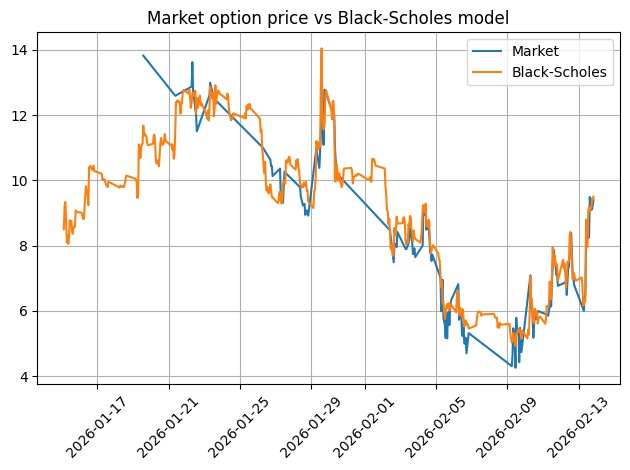

In [13]:
plt.plot(option_df.index, option_df['close'], label = "Market")
plt.plot(stock_df.index, stock_df['BS_price'], label="Black-Scholes")
plt.tick_params(axis='x', rotation=45)
plt.grid()
plt.legend()
plt.title("Market option price vs Black-Scholes model")
plt.tight_layout()
plt.show()